In [1]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
!nvidia-smi

Thu Sep 28 11:00:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   61C    P8               8W /  60W |     10MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
#how to get datasets? 
#we are using the food121 dataset starts with 101 diffrent classes of food and 1000 images per class 25% testing
# our datasets start ith 3 classes of food and only 10% of the images (-75 training )
#start with a small scale them incraese the scale wwhen necessary
#increase and speedup how fast we can experiment
import requests
import zipfile
from pathlib import Path

data_path = Path("dataset/")
image_path = data_path / "pizza_steak_sushi"

#if image folder doesnt exsist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} doesnt not exist creating one")
    image_path.mkdir(parents=True,
                     exist_ok=True)
#download pizza_steak_sushi dataset
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("downloading dataset")
    f.write(request.content)
    
#unzip pizza, steak,, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("unzipping pizza, steakd and sushi data...")
    zip_ref.extractall(image_path)

dataset/pizza_steak_sushi directory already exists... skipping download
downloading dataset
unzipping pizza, steakd and sushi data...


## data preprocessing (data prep nd adata exploratino)

In [4]:
import os
def walk_through_dir(dir_path):
    """_summary_
    walks thorugh dir_path returning its contents.
    Args:
        dir_path (POSIX_PATH): _description_
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f" there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

 there are 2 directories and 0 images in 'dataset/pizza_steak_sushi'.
 there are 3 directories and 0 images in 'dataset/pizza_steak_sushi/train'.
 there are 0 directories and 72 images in 'dataset/pizza_steak_sushi/train/sushi'.
 there are 0 directories and 75 images in 'dataset/pizza_steak_sushi/train/steak'.
 there are 0 directories and 78 images in 'dataset/pizza_steak_sushi/train/pizza'.
 there are 3 directories and 0 images in 'dataset/pizza_steak_sushi/test'.
 there are 0 directories and 31 images in 'dataset/pizza_steak_sushi/test/sushi'.
 there are 0 directories and 19 images in 'dataset/pizza_steak_sushi/test/steak'.
 there are 0 directories and 25 images in 'dataset/pizza_steak_sushi/test/pizza'.


In [6]:
#setup trianig and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('dataset/pizza_steak_sushi/train'),
 PosixPath('dataset/pizza_steak_sushi/test'))

dataset/pizza_steak_sushi/train/steak/1937872.jpg
random iamge path: dataset/pizza_steak_sushi/train/steak/1937872.jpg
image class: steak
image heigh: 512
image wideth: 512


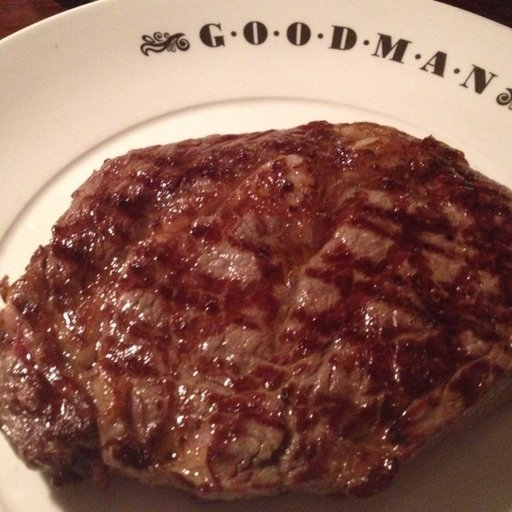

In [7]:
#viszlaing the images 
#get all of the images apths,
#2. picja random iamg epath using python's random.choice()
#.3 ge tthe iamge class name 

import random
from PIL import Image

# random.seed(42)
#get all the image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))

#pick a random iamge path
random_image_path = random.choice(image_path_list)
print(random_image_path)

#get image clas from path name(the image class is the nameo fo thedir where the image is stored)
image_class = random_image_path.parent.stem
image_class

img = Image.open(random_image_path)
print(f"random iamge path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image heigh: {img.height}")
print(f"image wideth: {img.width}")
img


Text(0.5, 1.0, 'image class: steak | image shape: (512, 512, 3) -> [height, width, color channels]')

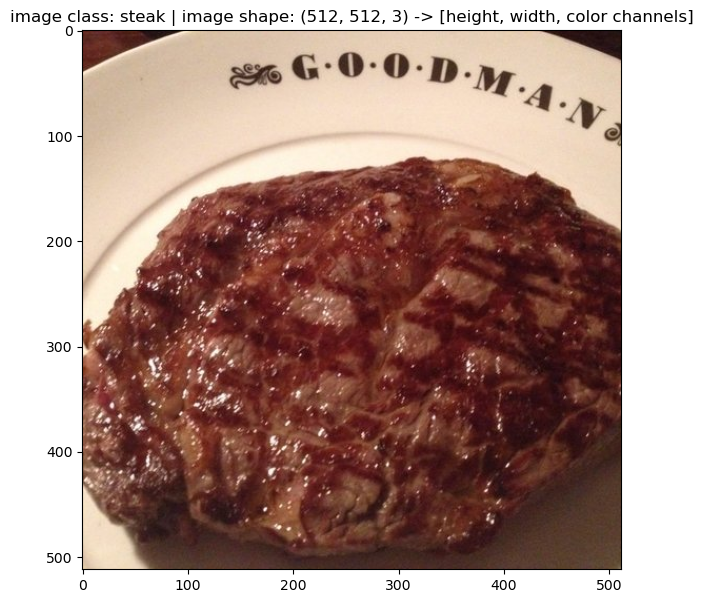

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#turn img into array
img_as_array = np.asanyarray(img)
img_as_array.shape
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} | image shape: {img_as_array.shape} -> [height, width, color channels]")
#here we have color chanlles last

In [9]:
img_as_array

array([[[ 92,  33,  27],
        [ 98,  39,  33],
        [ 98,  39,  33],
        ...,
        [ 27,  19,  17],
        [ 28,  19,  20],
        [ 27,  18,  19]],

       [[ 98,  39,  33],
        [100,  41,  35],
        [ 99,  40,  34],
        ...,
        [ 31,  23,  21],
        [ 30,  20,  21],
        [ 27,  18,  19]],

       [[102,  45,  38],
        [102,  45,  38],
        [101,  44,  37],
        ...,
        [ 33,  23,  21],
        [ 32,  20,  20],
        [ 28,  18,  17]],

       ...,

       [[232, 208, 174],
        [228, 204, 170],
        [225, 202, 170],
        ...,
        [109,  91,  67],
        [111,  93,  71],
        [111,  93,  71]],

       [[232, 208, 172],
        [230, 206, 170],
        [227, 204, 170],
        ...,
        [114,  96,  72],
        [120, 102,  80],
        [122, 104,  82]],

       [[232, 208, 172],
        [230, 206, 170],
        [228, 205, 171],
        ...,
        [118, 100,  76],
        [127, 109,  87],
        [131, 113,  91]]

## transforming data into tensor

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
#transforming data using torchvision.transform
data_transform = transforms.Compose([
    #resizeour images to 64*64
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [12]:
data_transform(img)

tensor([[[0.1451, 0.1490, 0.1451,  ..., 0.3882, 0.3804, 0.3686],
         [0.1569, 0.1569, 0.1569,  ..., 0.4078, 0.3961, 0.3765],
         [0.1725, 0.2784, 0.4863,  ..., 0.3961, 0.3961, 0.3922],
         ...,
         [0.3647, 0.3608, 0.3647,  ..., 0.9647, 0.9529, 0.9294],
         [0.3725, 0.3686, 0.3647,  ..., 0.9569, 0.9412, 0.8980],
         [0.3922, 0.3765, 0.3647,  ..., 0.9412, 0.9137, 0.8745]],

        [[0.0824, 0.0784, 0.0667,  ..., 0.1686, 0.1725, 0.1608],
         [0.0863, 0.0784, 0.0784,  ..., 0.1843, 0.1804, 0.1608],
         [0.1020, 0.1922, 0.3961,  ..., 0.1725, 0.1686, 0.1608],
         ...,
         [0.2706, 0.2667, 0.2549,  ..., 0.8863, 0.8745, 0.8431],
         [0.2824, 0.2784, 0.2667,  ..., 0.8824, 0.8588, 0.8039],
         [0.3098, 0.2863, 0.2784,  ..., 0.8627, 0.8275, 0.7804]],

        [[0.0706, 0.0784, 0.0745,  ..., 0.1529, 0.1529, 0.1294],
         [0.0824, 0.0863, 0.0824,  ..., 0.1451, 0.1451, 0.1373],
         [0.0980, 0.1804, 0.3569,  ..., 0.1294, 0.1373, 0.

In [13]:
data_transform(img).dtype

torch.float32

In [14]:
data_transform(img).shape

torch.Size([3, 64, 64])

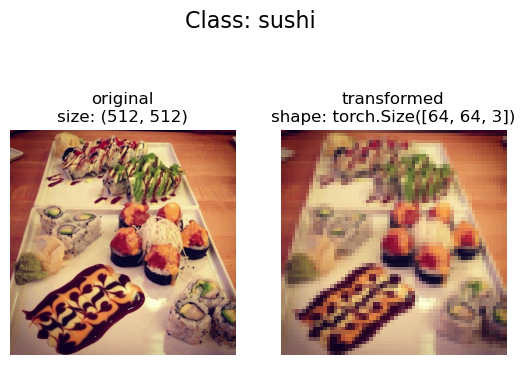

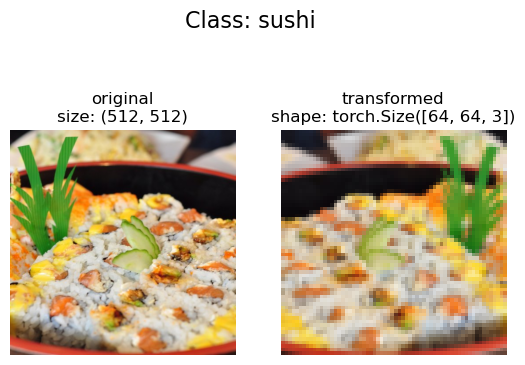

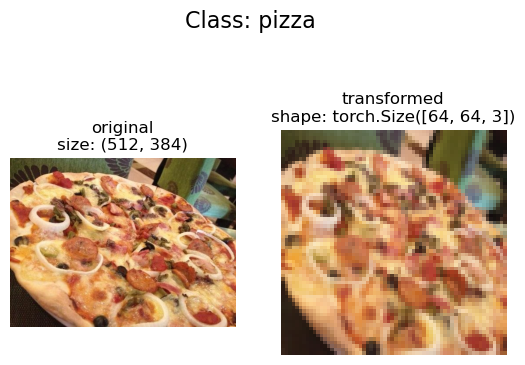

In [15]:
#we are gonna use transforms to help images get read to be used with a model/ data augmentation
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """Selects random images fromma ptoh of images and loads/ transofmr them and 
    plots the original and transformed version

    Args:
        image_path (_type_): _description_
        transform (_type_): _description_
        n (int, optional): _description_. Defaults to 3.
        seed (int, optional): _description_. Defaults to 42.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\nsize: {f.size}")
            ax[0].axis(False)
            
            #transform and plot target iamge
            transformed_image = transform(f).permute(1,2,0) #from (c,h,w) to (h,w,c) #we need to change shape coz matplotlib prefers color channels first
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"transformed\nshape: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16) #to get class name from path
    
plot_transformed_images(image_paths=image_path_list, 
                        transform=data_transform,
                        n=3,
                        seed=None)
            

In [16]:
#option1 loading imge data using `imagefolder`
#we can load image classiciatino data uding `torchvision.datasts.ImageFolder
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform for thedata
                                  target_transform=None, #transofmr for label/target
                                  )
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)   
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: dataset/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: dataset/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
#get clss names as a loist
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [18]:
#get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
len(train_data), len(test_data) 

(225, 75)

In [20]:
train_data.samples[0]


('dataset/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [21]:
#indix on the train data dataset to a et single img and a lebl
img, label = train_data[0]

In [22]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [23]:
label

0

In [24]:
img, label = train_data[0][0], train_data[0][1]
print(f"image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"imge datatype: {img.dtype}")
print(f"imge label:{label}")
print(f"labe dataype: {type(label)}")

image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [25]:
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [26]:
class_names[label]

'pizza'

original shape torch.Size([3, 64, 64])-> [color channels, height, width]
permuted shape torch.Size([64, 64, 3]) -> [heigh, wdith, color channels]


Text(0.5, 1.0, 'pizza')

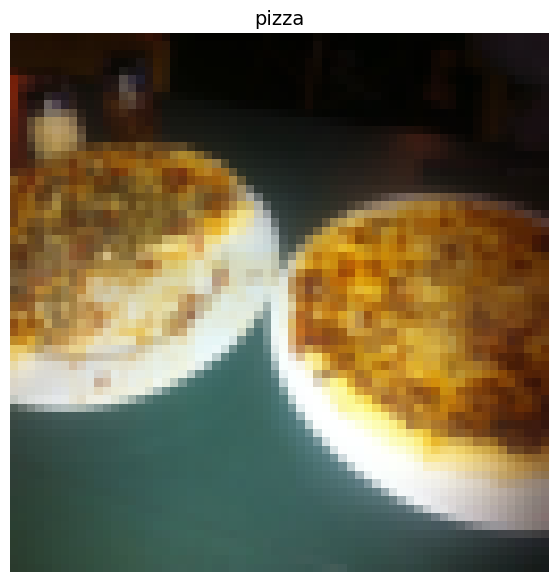

In [27]:
#rearrange th roder of dimensions to plot 
img_perumute = img.permute(1,2,0)

#print out differnet shapes
print(f"original shape {img.shape}-> [color channels, height, width]")
print(f"permuted shape {img_perumute.shape} -> [heigh, wdith, color channels]")

plt.figure(figsize=(10,7))
plt.axis(False)
plt.imshow(img_perumute)
plt.title(class_names[label], fontsize=14)


In [28]:
import os
os.cpu_count()

8

In [29]:
#creating a train_dataloader and a test_dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(), #number of cpu cores used 
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f5254097dd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f525dd23dd0>)

In [30]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [31]:
len(train_data), len(test_data)

(225, 75)

In [32]:
img, label = next(iter(train_dataloader))

#batch size is 1, you can change bactch size if uou like
print(f"imge shape :{img.shape} -> [batch_size, color channels, height, wdith]")
print(f"label shape: {label.shape}")

imge shape :torch.Size([1, 3, 64, 64]) -> [batch_size, color channels, height, wdith]
label shape: torch.Size([1])


## option2 : loading imge dadta with a custom `dataset`
1. load images from file
2. class names list
3. get class dict 

Pros:
*can create a `dataset` out of almost anything
* not limited to pytroch prebuilt `dataset` functions

cons:
even though you could craete `dataset` out of almost anything, it doesnt mean it will work...
* using a cusom `Dataset` ofent results in us writing more code , therfore more errors and performance issues

In [33]:
#hwat if image foler didnt exists? creating our own 
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List #for explicit typing our classes and def functions


In [34]:
#instance of torch.dataset,Imagefler()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [35]:
#creating a helper functions to get class anmes
target_directory  = train_dir
print(f"target dir: {target_directory}")

#get the class names from the target directory 
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target dir: dataset/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [36]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """find the class folder names in a target directory."""
    # get the calas names by scannin gthe target directory 
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # raise rerror if class anems could not be found
    if not classes:
        raise FileNotFoundError(f"couldnt find any classes in {directory}... please check file structure")
    
    #3. crate a dict of index labels (comouters prfere number rather than strings as labels)
    class_to_idx = {class_names: i for i, class_names in enumerate(classes)}
    return classes, class_to_idx


In [37]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### to create a custom `dataset ` t replication `imagefolder`

to create won own ustom datast, we want to:

1. subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a tranformif we'd liek to tranform our data
3. crete attributes
4. create a functio to `load_images()` 
5. overwrite the `__len()__` method to return athe length of our dataset
6. overwrite th `__gititem()__` method to return a givem sample when passed an index


In [64]:
#write a custom dataset class
from torch.utils.data import Dataset

#1.subclass it
class ImageFolderCustom(Dataset):
    #2. initialize our custom dataset
    def __init__(self, 
                 targ_dir: str, 
                 transform=None):
        #create class atrributes
        #get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        #setup tranforms
        self.transform = transform
        #create class and class to idx attributes
        self.classes , self.class_to_idx = find_classes(targ_dir)
        
    #4. create  a fucntio to load images
    def load_image(self, index: int) -> Image.Image:
        """Opens an image via  apath and reutnrs it."""
        image_path = self.paths[index]
        return Image.open(image_path)
    
    #overwrite __len__()
    def __len__(self) -> int:
        """reutrn the total number of samples"""
        return len(self.paths)
    
    #overwttei get item method as dataset module requires it (check docs)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor,int]:
        """reutnrs one sample of data, data and label (X,y).(tuple)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name #expects path in format: data_dfodler/class_name/iamge.jpg
        class_idx = self.class_to_idx[class_name]
    
    #tranform if necessary 
        if self.transform:
            return self.transform(img), class_idx #return data, abel (X,y)
        else:
            return img, class_idx #return untranformed image andd label
        
    

In [39]:
img, label = train_data[0]

In [40]:
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [65]:
#create a tranform
train_transoforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [66]:
#test our imagefoldercustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transoforms
                                      )
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [67]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f523fc2ee10>,
 <__main__.ImageFolderCustom at 0x7f523fb9bdd0>)

In [68]:
len(train_data), len(train_data_custom)

(225, 225)

In [69]:
len(test_data), len(test_data_custom)

(75, 75)

In [70]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [71]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [72]:
#check for equality between original ImageFolder Dataset and Imagfolder customdataset
print(f"{train_data_custom.classes==train_data.classes}")
print(f"{test_data_custom.classes==test_data.classes}")

True
True


In [73]:
### 5.3 create a functions to isplay reandom images
# take in `dDataset` and a number of other paramters ucha as classnames and how many images to visualize.
#to rpeventt htedisplay getting out of hand, let's ca the number of times to see at 10.
#set the random seedd for reprod
# get a list of random smaples indexes from the target dataset.
#setup a matplotpit plot 
#loop thorught ht eranomd smamlpe indexe andd plat them with matplotlib. 
# make sure the ddimensios of our iamges line up with matplotlib (HWC)

In [74]:
#creata  fucntions to tkae in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    #2.adjust display if n is too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"for display purposes , n shouldn't be larger than 10, settign to 10 and removing shape display.")
        
        #3.  set the random seed for reprod
    if seed:
        random.seed(seed)
    
    #get random somaple indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    
    #setup plot
    plt.figure(figsize= (16,8))
    
    #loop thourgh the random sample
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        
        #7. adjsut tensor idmsinos for plotting (CHW) -> (HWC)
        targ_image_adjust = targ_image.permute(1,2,0) # (HWC)
        
        #plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title += f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

In [75]:
random.sample(range(len(train_data_custom)), k=10)

[50, 183, 166, 179, 139, 107, 56, 114, 150, 71]

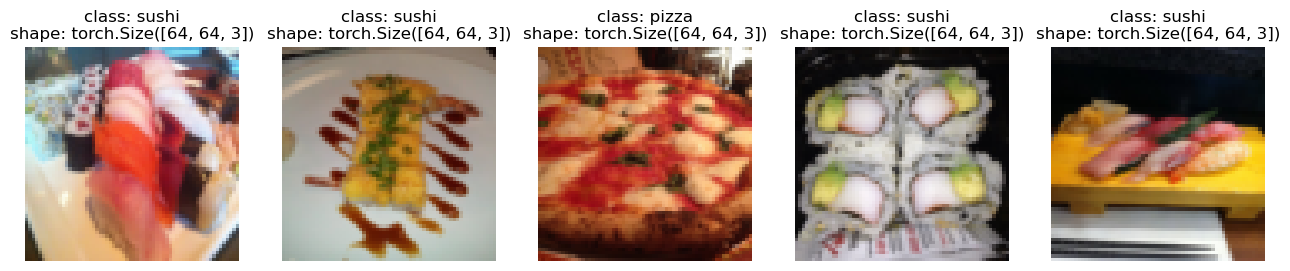

In [76]:
#display random iages from the ImageFOlder created Dataset
display_random_images(dataset=train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

for display purposes , n shouldn't be larger than 10, settign to 10 and removing shape display.


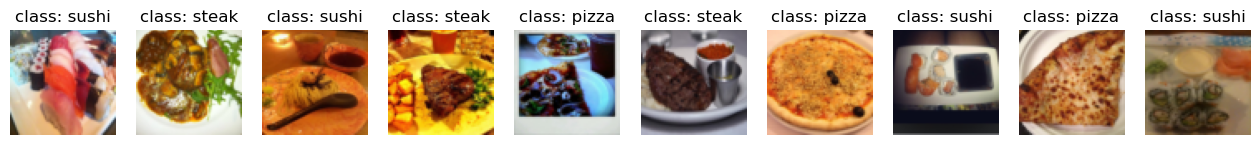

In [78]:
#displa y random images form ImageFoldercustom Dataset
display_random_images(dataset=train_data_custom,
                        n=20,
                        classes=class_names,
                        seed=None)

In [80]:
#creating dataloaders

#turn custom loaded images into `dataloaders`
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
import os
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f523f4e5790>,
 <torch.utils.data.dataloader.DataLoader at 0x7f523f4e5c90>)

In [82]:
#get a iamge and label from a custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))
#pitn out the sahpes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [95]:
class_names[label_custom[4]]

'pizza'

## other forms of transforms (data augmentation)
process of artificially adding diveristy to your training data, 
in case of image data, this ay mean applying varous imag etranfosmations to the training images

let's take a look at one particcular typeof data augmentation used to train pytorch vision models to state of the art levels....

results in a model that is more generalizabel to unseen data

## lets look at the pytprch state of the art trivial augment

In [102]:
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # magnitude of augmentation max is 31
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [103]:
#gget all iamge paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('dataset/pizza_steak_sushi/train/sushi/3004029.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/2797464.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/3107839.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/2004525.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/1221830.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/390178.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/2873571.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/1551817.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/17704.jpg'),
 PosixPath('dataset/pizza_steak_sushi/train/sushi/840444.jpg')]

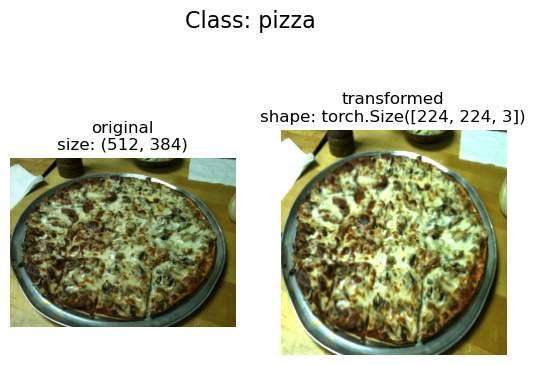

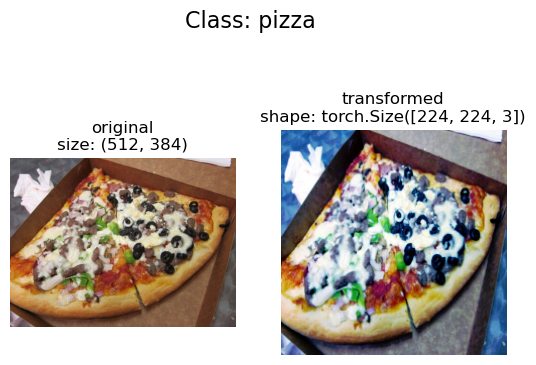

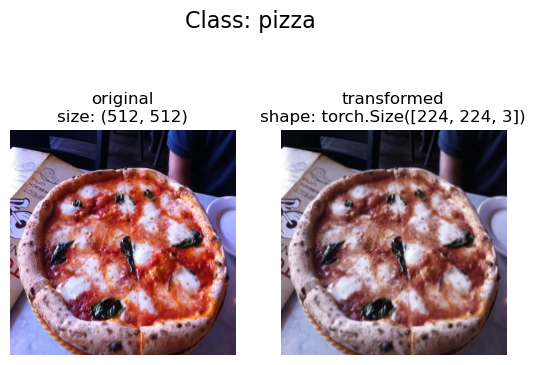

In [104]:
#Plot random tranformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## BUildg the modeL!EK


In [105]:
##7. model0: tinyvgg without data augmentation !
#replicatie the tunyvgg arch from the CNN explainer website `https://poloclub.github.io/cnn-explainer/`


In [106]:
#create a transforms for model0 without data augmentaiton
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [107]:
#load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform,
)

test_data_simple = datasets.ImageFolder(
    root=test_dir,
    transform=simple_transform
)

#2. turn the daatasets into dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
#create the dataloaders 
train_dataloader_simple = DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [136]:
### create tinyvgg model class
class TinyVGG(nn.Module):
    """model architecture from https://poloclub.github.io/cnn-explainer/"""
    
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int
                 ) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)) #default stride is same as kernel size for maxpool2d
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2
        )
        )
        
        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, # we need to do the trick to get the input shape 
                      out_features=output_shape)
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier_layer(x)
        # print(x.shape)
        return x
        #return self.classifier_layer(self.conv_block_2(self.conv_block_1(x))) benefits from operator fusion # takes less time # speedsup gpu 
        #use above if u know exact input shape of linear layer
        # operator fusion is one of the most important optimizations fo deep learning compilers

>## https://horace.io/brrr_intro.html

In [137]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## trick to find input shape of the linear layer in thourhg thte print statements and using dummy data

In [120]:
### 7.3 try a forward pass on a single image( to test the model)
#to get a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [113]:
#try a forward pass
model_0(image_batch.to(device))

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2560 and 10x3)

## from the runtime error above u can see we need to c1 and r2 to be the same for matrix multiplication
## from this we get the correct in_features for the linear_layer after `nn.flatten()`

In [115]:
10*16*16 # after flatten we get 

2560

In [133]:
model_0(image_batch.to(device))

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.2141e-02, -2.4331e-03,  9.7279e-03],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2015e-02, -1.4427e-03,  7.8839e-03],
        [ 1.8531e-02, -9.9986e-05,  8.0369e-03],
        [ 1.9419e-02, -1.3767e-03,  1.1126e-02],
        [ 2.0323e-02, -1.7798e-03,  7.8779e-03],
        [ 1.9683e-02, -5.2765e-03,  9.3057e-03],
        [ 2.0531e-02, -3.9330e-03,  1.0121e-02],
        [ 2.2621e-02, -2.8323e-03,  1.1813e-02],
        [ 2.0226e-02,  4.4106e-04,  1.0933e-02],
        [ 2.0046e-02,  4.5709e-04,  1.0549e-02],
        [ 2.0669e-02,  2.8662e-03,  7.6834e-03],
        [ 2.1628e-02, -6.8459e-05,  9.2268e-03],
        [ 1.8115e-02, -1.2474e-04,  1.0741e-02],
        [ 1.9423e-02, -3.4742e-03,  1.1606e-02],
        [ 2.0772e-02,  1.3448e-03,  9.7040e-03],
        [ 2.0510e-02, -7.8606e-04,  8.4659e-03],
        [ 1.9368e-02, -7.8519e-04,  1.0480e-02],
        [ 2.3170e-02, -1.5725e-03,  8.5609e-03],
        [ 2.0672e-02

## using otorchinfo to get an idea of the shapes going thorgh our model
## so we dont have to use print statements

In [138]:
#install otrhc info
!paru -S python-torchinfo

:: Resolving dependencies...
:: Calculating conflicts...
:: Calculating inner conflicts...
:: marked out of date: python-torchinfo

Aur (1)               Old Version  New Version  Make Only
aur/python-torchinfo  1.7.1-1      1.7.1-1      No

:: Proceed to review? [Y/n]: ^C


In [142]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## we get error if we input wrong input size

In [144]:
#training our tinyvgg model
def train_step(dataloader: torch.utils.data.DataLoader,
               model: torch.nn.Module,
               loss_fn = torch.nn.Module,
               optimizer = torch.optim.Optimizer,
               device = device):
    model.train()
    #setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    for batch, (X,y) in enumerate(dataloader):
        #send data to target device
        X, y = X.to(device), y.to(device)
        
        #forwad pass
        y_pred = model(X) #out model logits
        #clac the lloss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        #optimzer zero grad
        optimizer.zero_grad()
        #loss backwaad
        loss.backward()
        #optimzzer step
        optimizer.step()
        
        #clac the accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred) #totalno that are right/ div by len of samples)
        
    
    #adjust metrics to get the average loss and aacc
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    return train_loss, train_acc
        

In [149]:
def test_step(dataloader: torch.utils.data.DataLoader,
              model: nn.Module,
              loss_fn = torch.nn.Module,
              device =device):
    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        #loop thourgh dataloader
        for batch, (X,y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            #forward pass
            test_pred_logits = model(X)
            #calc the aloss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            #cacl the acc
            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
        
        #adjust metics to get average los and acc
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [150]:
from tqdm.auto import tqdm

In [153]:
def train(train_datalaoader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          model: nn.Module,
          loss_fn: nn.Module,
          optimizer = torch.optim.Optimizer,
          epochs: int = 5,
          device = device):
    #create an empty results dict
    results = {"train_loss" : [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n-------")
        train_loss, train_acc = train_step(dataloader=train_datalaoader,
                   model=model,
                   loss_fn=loss_fn,
                   optimizer=optimizer,
                   device=device)
        
        test_loss, test_acc = test_step(dataloader=test_dataloader,
                  model=model,
                  loss_fn=loss_fn,
                  device=device)
        #print out whats ahppening 
        print(f"Epoch: {epoch} | train_loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")
        
        #udpate reslts dict
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)
        
    #6. reils the filled reulsts at the ned ot he epochs
    return results
        

In [ ]:
### train and eval molde_0
